In [1206]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Les données du dataset

In [1207]:
# Chargement des données
def load_data(file_path):
    data = []
    with open(file_path, mode='r') as file:
        reader = csv.reader(file)
        header = next(reader)  # Lire l'en-tête
        for row in reader:
            data.append(row)
    return header, np.array(data)

header, data = load_data("air-quality-india.csv")

df = pd.DataFrame(data= data, columns=header)
df

,Timestamp,Year,Month,Day,Hour,PM2.5
0,2017-11-07 12:00:00,2017,11,7,12,64.51
1,2017-11-07 13:00:00,2017,11,7,13,69.95
2,2017-11-07 14:00:00,2017,11,7,14,92.79
3,2017-11-07 15:00:00,2017,11,7,15,109.66
4,2017-11-07 16:00:00,2017,11,7,16,116.5
...,...,...,...,...,...,...
36187,2022-06-04 11:00:00,2022,6,4,11,35.89
36188,2022-06-04 12:00:00,2022,6,4,12,33.83
36189,2022-06-04 13:00:00,2022,6,4,13,33.05
36190,2022-06-04 14:00:00,2022,6,4,14,35.29


In [1208]:
df.shape

(36192, 6)

In [1209]:
df.columns

Index(['Timestamp', 'Year', 'Month', 'Day', 'Hour', 'PM2.5'], dtype='object')

In [1210]:
df.dtypes

Timestamp    object
Year         object
Month        object
Day          object
Hour         object
PM2.5        object
dtype: object

In [1211]:
df['PM2.5'] = df['PM2.5'].astype(float)
df['Year'] = df['Year'].astype(int)
df['Month'] = df['Month'].astype(int)
df['Day'] = df['Day'].astype(int)
df['Hour'] = df['Hour'].astype(int)

In [1212]:
df.isnull()

,Timestamp,Year,Month,Day,Hour,PM2.5
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
36187,False,False,False,False,False,False
36188,False,False,False,False,False,False
36189,False,False,False,False,False,False
36190,False,False,False,False,False,False


In [1213]:
print(df.isnull().sum())

Timestamp    0
Year         0
Month        0
Day          0
Hour         0
PM2.5        0
dtype: int64


In [1214]:
df.isna()

,Timestamp,Year,Month,Day,Hour,PM2.5
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
36187,False,False,False,False,False,False
36188,False,False,False,False,False,False
36189,False,False,False,False,False,False
36190,False,False,False,False,False,False


In [1215]:
print(df.isna().sum())

Timestamp    0
Year         0
Month        0
Day          0
Hour         0
PM2.5        0
dtype: int64


In [1216]:
df.duplicated().sum()

0

In [1217]:
# Drop timestamp cause it's an object and it was already split into year, montj, day, hour
df.drop(columns='Timestamp', inplace=True)

# Echantillonnage  des  données

In [1218]:
# X = df[['Day', 'Year', 'Month', 'Hour']].values
X = df['Year'].values.reshape(-1, 1)
y = df['PM2.5'].values

In [1219]:
# Division des données en k-folds
def cross_validation_split(data, k=10):
    np.random.shuffle(data)
    folds = np.array_split(data, k)
    return folds

# Exploration et prétraitement des données : 

## Exploration des données : 

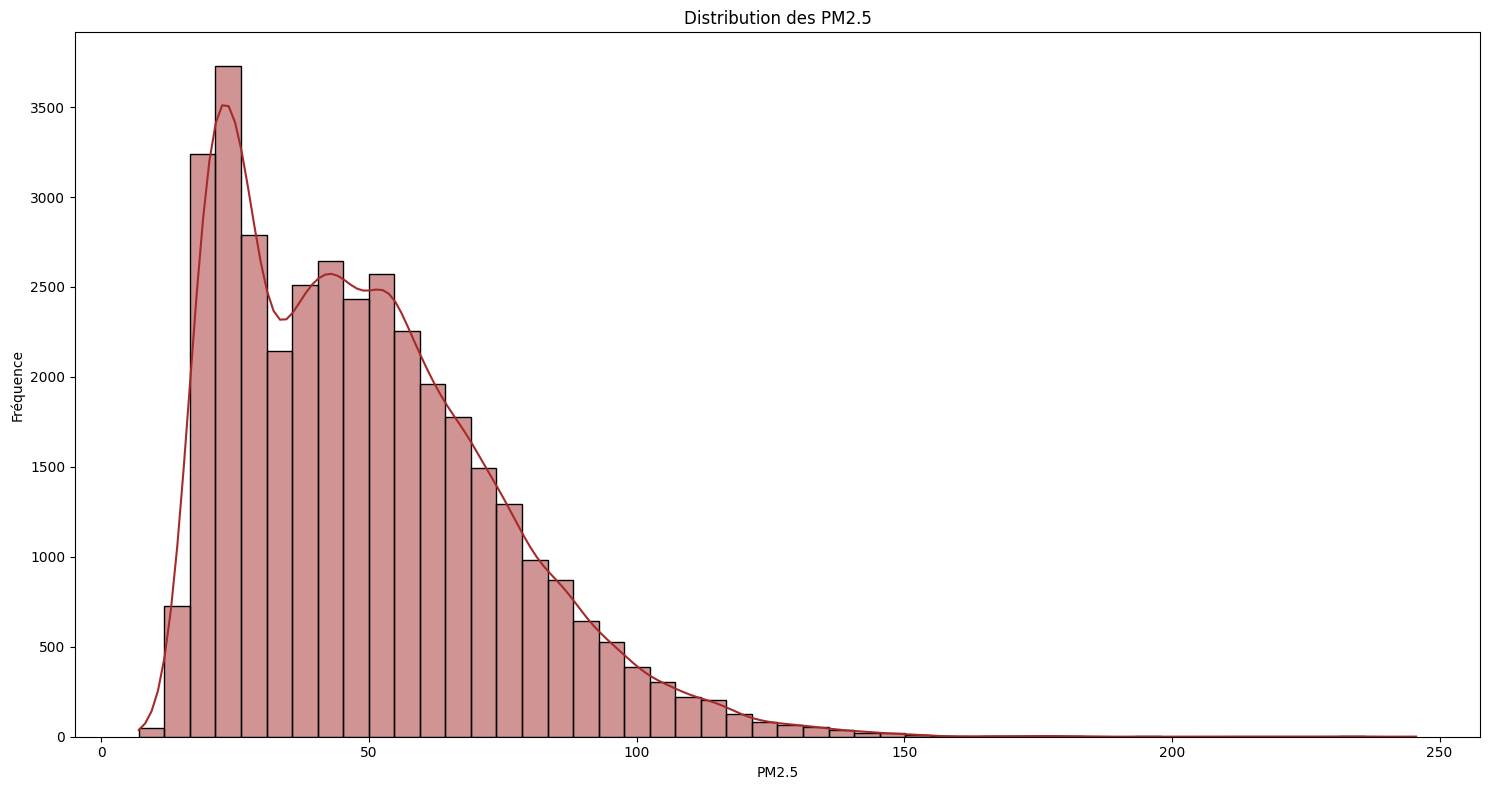

In [1220]:
# Visualisation des revenus 
plt.figure(figsize=(15, 8))
sns.histplot(data=df, x='PM2.5', kde=True, bins=50, color="brown")
plt.title("Distribution des PM2.5")
plt.xlabel('PM2.5')
plt.ylabel('Fréquence')
plt.tight_layout()
plt.show()

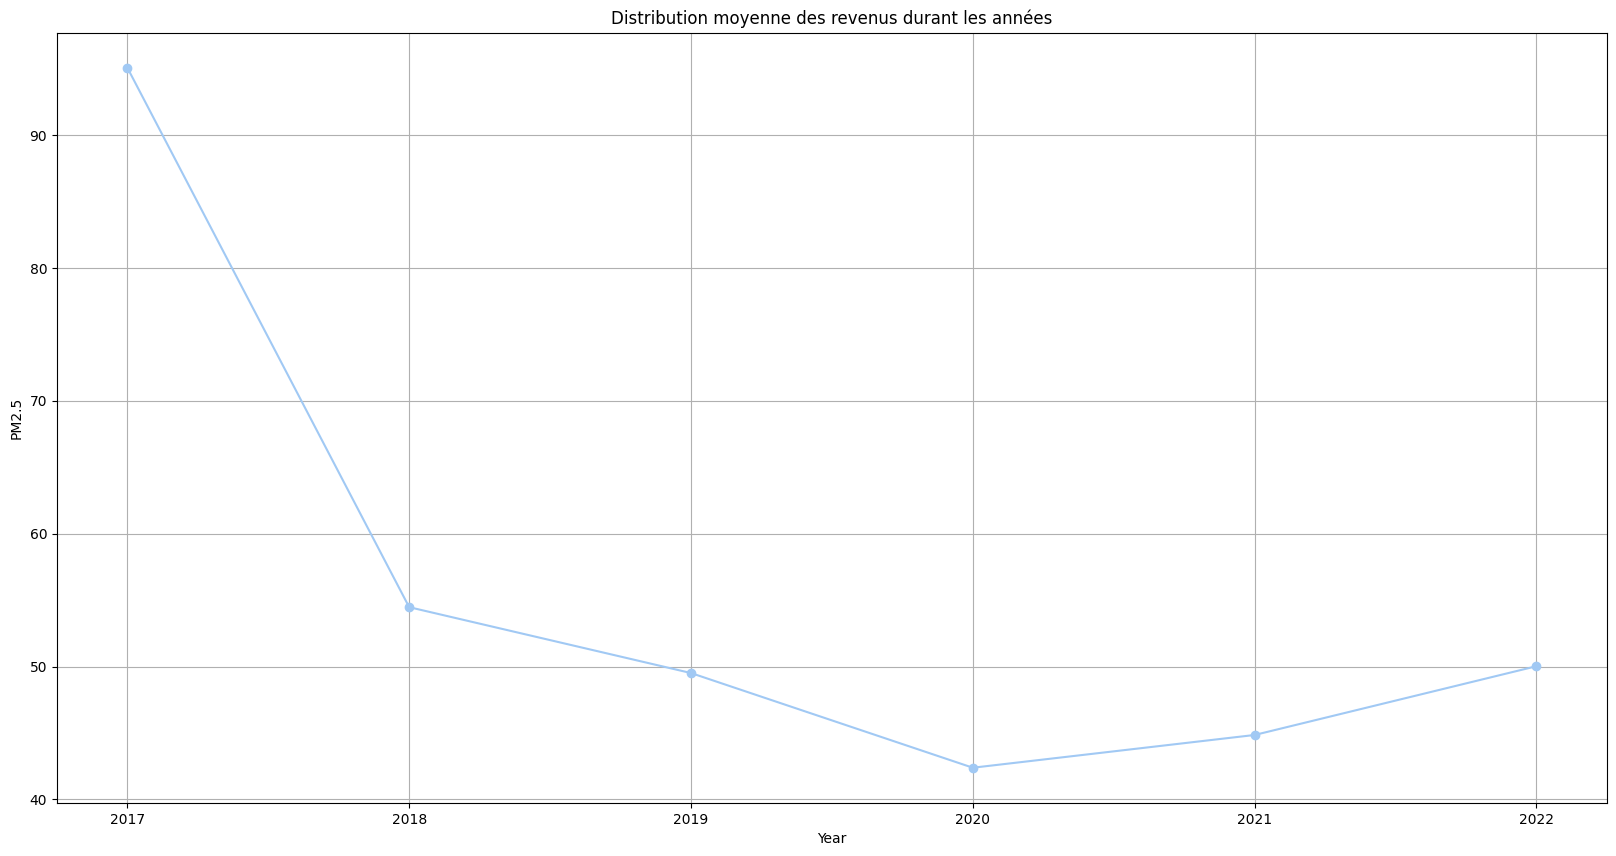

In [1221]:
# Visualisation du PM2.5 durant les années

# Calcul de la moyenne des PM2.5 par année
year_counts = df.groupby("Year")["PM2.5"].mean()

# Génération de la palette de couleurs
colors = sns.color_palette("pastel", len(year_counts))

# Création de la figure et de l'axe
plt.figure(figsize=(20, 10))

# Tracé de la ligne
year_counts.plot(kind='line', marker='o', color=colors)

# Ajout du titre et des labels
plt.title("Distribution moyenne des revenus durant les années")
plt.xlabel('Year')
plt.ylabel('PM2.5')

# Ajouter une grille pour mieux visualiser
plt.grid(True)

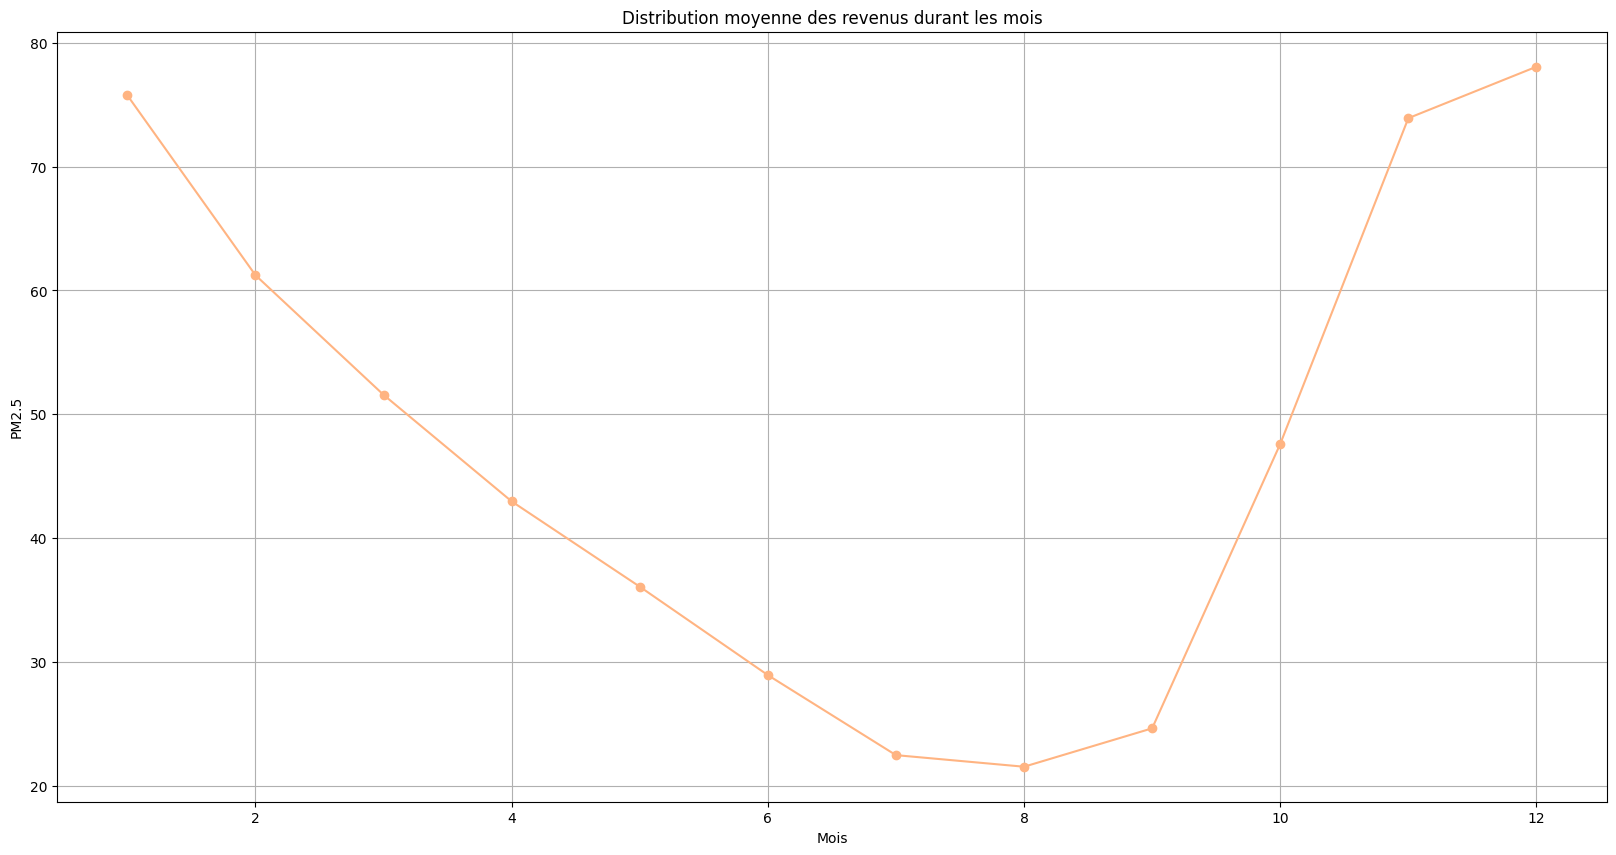

In [1222]:
# Visualisation du PM2.5 durant les mois

# Calcul de la moyenne des PM2.5 par mois
mois_counts = df.groupby("Month")["PM2.5"].mean()

# Création de la figure et de l'axe
plt.figure(figsize=(20, 10))

# Tracé de la ligne
mois_counts.plot(kind='line', marker='o', color=colors[1])

# Ajout du titre et des labels
plt.title("Distribution moyenne des revenus durant les mois")
plt.xlabel('Mois')
plt.ylabel('PM2.5')

# Ajouter une grille pour mieux visualiser
plt.grid(True)

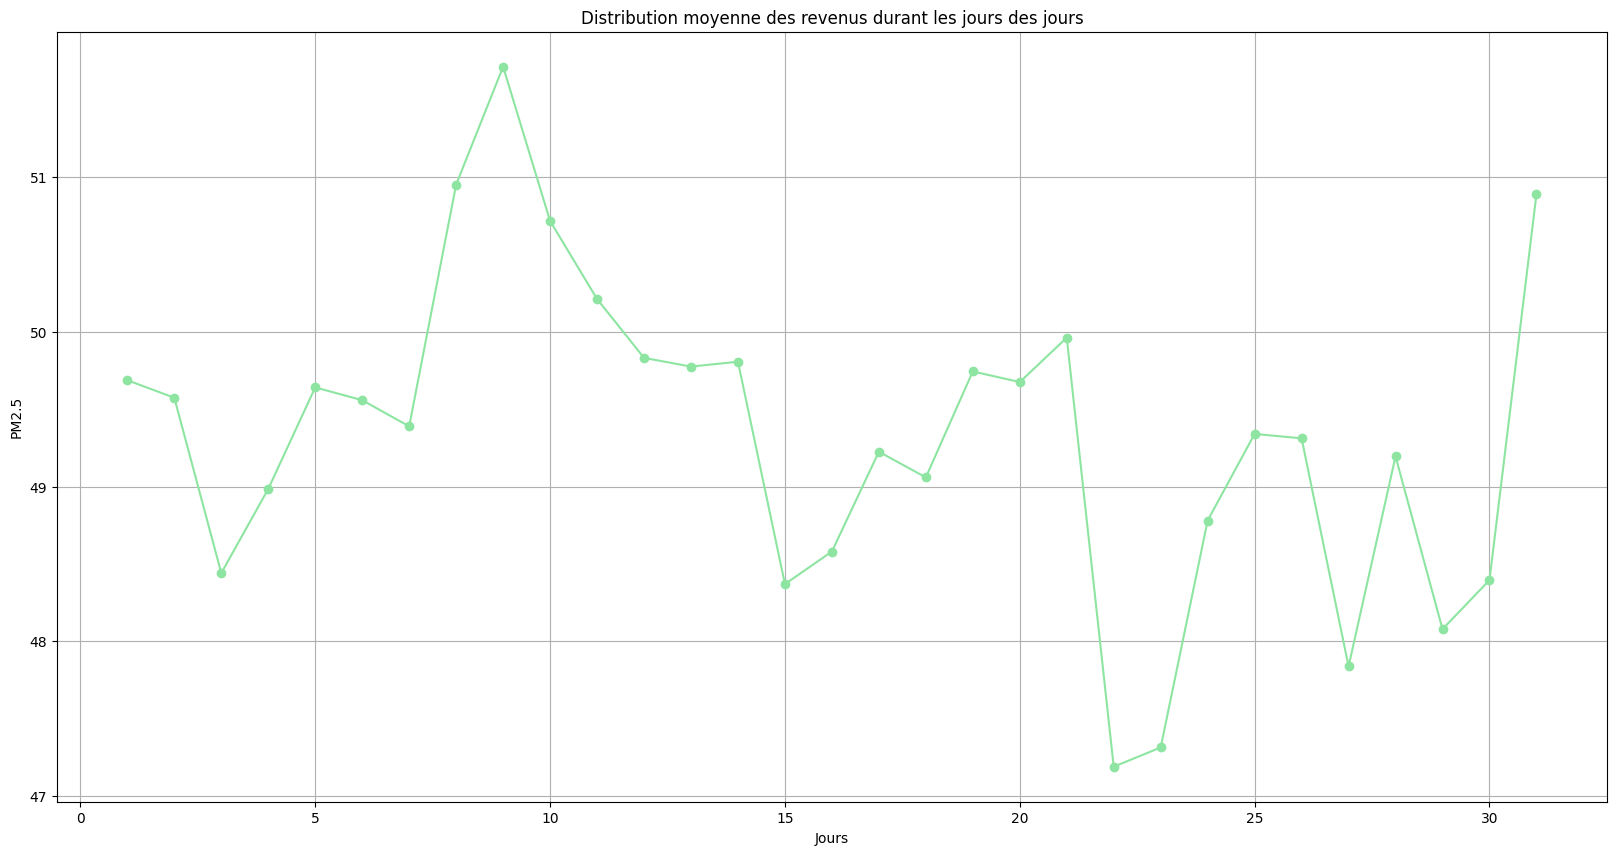

In [1223]:
# Visualisation du PM2.5 durant les jours

# Calcul de la moyenne des PM2.5 par jour
jour_counts = df.groupby("Day")["PM2.5"].mean()

# Création de la figure et de l'axe
plt.figure(figsize=(20, 10))

# Tracé de la ligne
jour_counts.plot(kind='line', marker='o', color=colors[2])

# Ajout du titre et des labels
plt.title("Distribution moyenne des revenus durant les jours des jours")
plt.xlabel('Jours')
plt.ylabel('PM2.5')

# Ajouter une grille pour mieux visualiser
plt.grid(True)

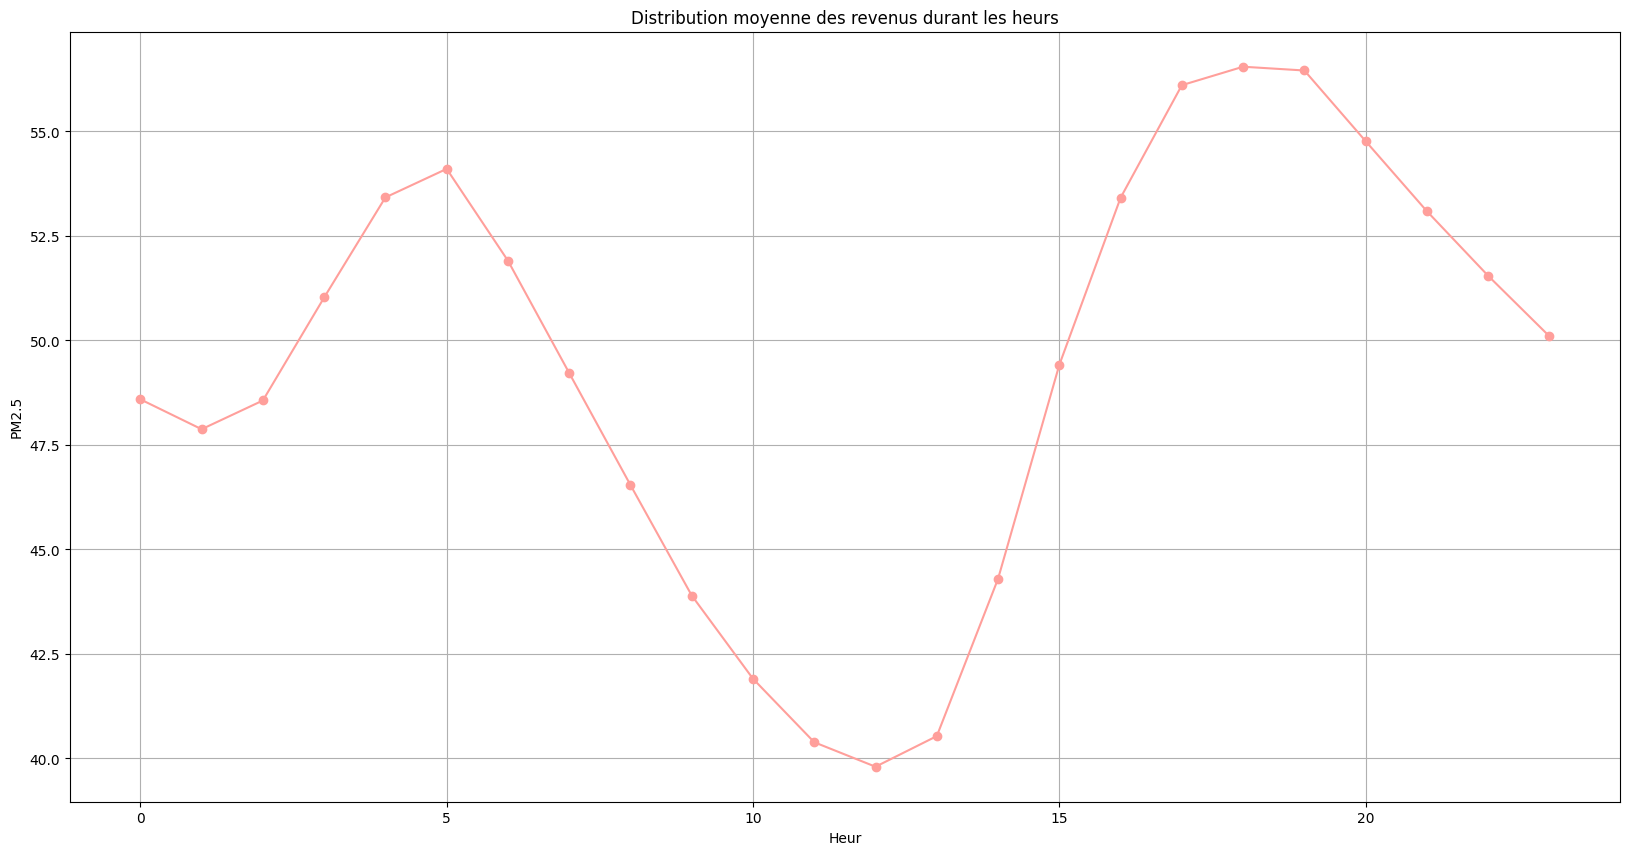

In [1224]:
# Visualisation du PM2.5 durant les heurs

# Calcul de la moyenne des PM2.5 par heur
heur_counts = df.groupby("Hour")["PM2.5"].mean()

# Création de la figure et de l'axe
plt.figure(figsize=(20, 10))

# Tracé de la ligne
heur_counts.plot(kind='line', marker='o', color=colors[3])

# Ajout du titre et des labels
plt.title("Distribution moyenne des revenus durant les heurs")
plt.xlabel('Heur')
plt.ylabel('PM2.5')

# Ajouter une grille pour mieux visualiser
plt.grid(True)

In [1225]:
# Fonction pour calculer la corrélation de Pearson
def pearson_correlation(x, y):
    # Vérifier que x et y ont la même longueur
    if len(x) != len(y):
        raise ValueError("Les vecteurs x et y doivent avoir la même longueur")
    
    # Calcul des moyennes de x et y
    mean_x = np.mean(x)
    mean_y = np.mean(y)
    
    # Calcul des écarts par rapport à la moyenne et des produits croisés
    numerator = np.sum((x - mean_x) * (y - mean_y))
    
    # Calcul des carrés des écarts et du dénominateur
    denominator = np.sqrt(np.sum((x - mean_x)**2) * np.sum((y - mean_y)**2))
    
    # Calcul de la corrélation de Pearson
    correlation = numerator / denominator
    
    return correlation

In [1226]:
df.dtypes

Year       int64
Month      int64
Day        int64
Hour       int64
PM2.5    float64
dtype: object

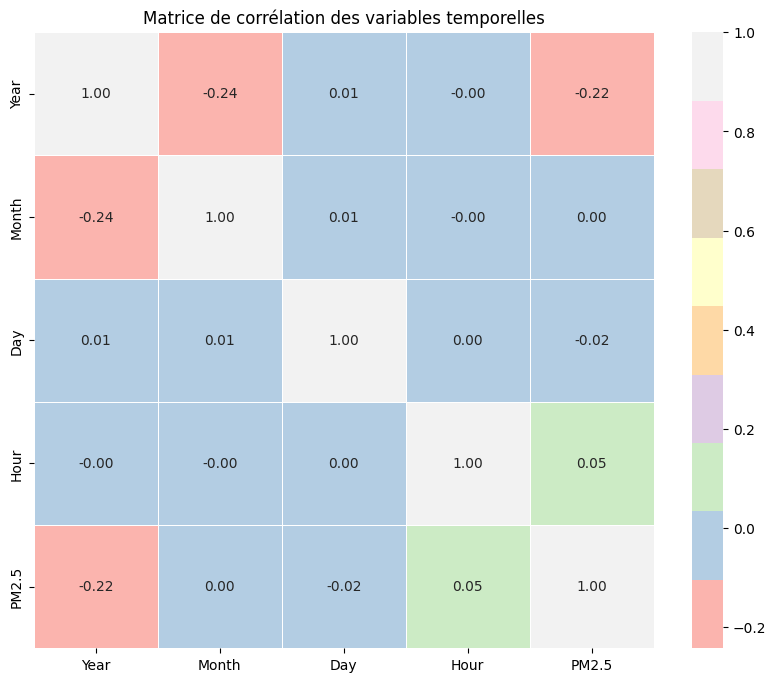

In [1227]:
# Calculer la corrélation entre les variables temporelles
correlation_matrix = pd.DataFrame(index=df.columns, columns=df.columns)

for col1 in df.columns:
    for col2 in df.columns:
        if col1 != col2:  # Ne pas calculer la corrélation d'une colonne avec elle-même
            correlation_matrix.loc[col1, col2] = pearson_correlation(df[col1], df[col2])
        else:
            correlation_matrix.loc[col1, col2] = 1.0  # La corrélation d'une colonne avec elle-même est 1

# Convertir les valeurs de la matrice en float
correlation_matrix = correlation_matrix.astype(float)

# Afficher la matrice de corrélation sous forme de heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Pastel1', fmt='.2f', linewidths=0.5)
plt.title("Matrice de corrélation des variables temporelles")
plt.show()

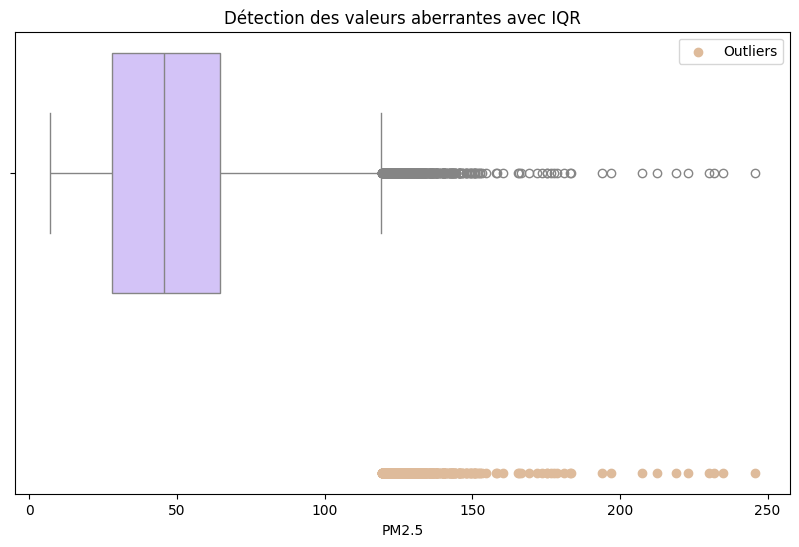

In [1228]:
def detect_outliers_iqr(df, column):
    # Calcul des quartiles Q1 et Q3
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1 # l'écart interquartile 
    
    # Définir les limites pour les outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Détecter les outliers
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    
    return outliers, lower_bound, upper_bound

# Appliquer la détection des outliers sur la colonne 'PM2.5'
outliers_pm25, lower_bound, upper_bound = detect_outliers_iqr(df, 'PM2.5')

# Affichage de la matrice de corrélation avec un boxplot
plt.figure(figsize=(10, 6))

# Boxplot de la variable 'PM2.5'
sns.boxplot(x=df['PM2.5'], color=colors[4])

# Mettre en évidence les valeurs aberrantes
plt.scatter(outliers_pm25['PM2.5'], [1] * len(outliers_pm25), color=colors[5], label='Outliers')

# Ajouter des titres et des labels
plt.title("Détection des valeurs aberrantes avec IQR")
plt.xlabel('PM2.5')
plt.legend()

# Afficher le graphique
plt.show()

In [1229]:
# Détecter les outliers dans la colonne 'PM2.5'
outliers_pm25, lower_bound, upper_bound = detect_outliers_iqr(df, 'PM2.5')

# Afficher le nombre d'outliers
print(f"Nombre d'outliers dans 'PM2.5': {outliers_pm25.shape[0]}")

Nombre d'outliers dans 'PM2.5': 378


## Prétraitement des données

In [1230]:
df.describe()

,Year,Month,Day,Hour,PM2.5
count,36192.000000,36192.000000,36192.000000,36192.000000,36192.000000
mean,2019.682278,6.331841,15.716401,11.477840,49.308429
std,1.345011,3.593321,8.859769,6.925088,24.863511
min,2017.000000,1.000000,1.000000,0.000000,7.020000
25%,2019.000000,3.000000,8.000000,5.000000,28.080000
50%,2020.000000,6.000000,16.000000,11.000000,45.730000
75%,2021.000000,10.000000,23.000000,17.000000,64.520000
max,2022.000000,12.000000,31.000000,23.000000,245.630000


In [1231]:
# Normalisation des données
def preprocess_data(X_train, X_test):
    # Calculer la moyenne et l'écart-type sur l'ensemble d'entraînement uniquement
    mean_train = np.mean(X_train, axis=0)
    std_train = np.std(X_train, axis=0)

    # Normaliser l'ensemble d'entraînement
    X_train_normalized = (X_train - mean_train) / std_train
    
    # Normaliser l'ensemble de test avec les statistiques de l'entraînement
    X_test_normalized = (X_test - mean_train) / std_train

    return X_train_normalized, X_test_normalized

def normalize_data_min_max(X_train, X_test):
    # Calculer les valeurs minimales et maximales sur l'ensemble d'entraînement
    X_train_min = np.min(X_train, axis=0)
    X_train_max = np.max(X_train, axis=0)

    # Normaliser l'ensemble d'entraînement
    X_train_normalized = (X_train - X_train_min) / (X_train_max - X_train_min)

    # Normaliser l'ensemble de test avec les statistiques de l'entraînement
    X_test_normalized = (X_test - X_train_min) / (X_train_max - X_train_min)

    return X_train_normalized, X_test_normalized

# Implémentation des modèles de régression : 

## Régression linéaire simple : 

In [1232]:
# Implémentation de la régression linéaire
# def linear_regression(X, y):
#     # Calculer les moyennes de X et y
#     mean_X = np.mean(X)
#     mean_y = np.mean(y)
    
#     # Calculer la covariance et la variance
#     cov_X_y = np.cov(X.T, y)[0, 1]   # Covariance de X et y
#     var_X = np.var(X)  # Variance de X
    
#     # Calculer le coefficient a (pente) et b (intercept)
#     a = cov_X_y / var_X
#     b = mean_y - a * mean_X
    
#     return a, b

# def predict(X, theta):
#     # Faire la prédiction en utilisant y = ax + b
#     return theta[0] * X + theta[1]
def linear_regression(X, y):
    X_b = np.hstack([X, np.ones((X.shape[0], 1))])  # Ajouter la colonne de biais
    theta = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y  # Formule analytique
    return theta
def predict(X, theta):
    X_b = np.hstack([X, np.ones((X.shape[0], 1))])
    return X_b @ theta

# Calcul du MSE
def calculate_mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)


In [ ]:
def k_fold_cross_validation_with_preprocessing(data, k, model_function):
    folds = cross_validation_split(data, k)
    mse_list = []
    y_pred_list = []
    

    for i in range(k):
        test_data = folds[i]
        train_data = np.vstack([fold for j, fold in enumerate(folds) if j != i])
        
        X_train, y_train = train_data[:, :-1], train_data[:, -1]
        X_test, y_test = test_data[:, :-1], test_data[:, -1]
        
        # Appliquer le prétraitement séparément
        y_train_preprocessed, y_test_preprocessed = normalize_data_min_max(y_train, y_test)
        
        # Entraîner le modèle et prédire
        theta = model_function(X_train, y_train_preprocessed)
        y_pred = predict(X_test, theta)
        
        # Calculer le MSE pour ce fold
        mse = calculate_mse(y_test_preprocessed, y_pred)
        mse_list.append(mse)

    # Retourner la moyenne des MSE
    return np.mean(mse_list)

In [1234]:
# Exemple d'utilisation
k = 10
columns = ['Year', 'Month', 'Day', 'Hour']
for column in columns:
    X = df[column].values.reshape(-1,1)
    average_mse = k_fold_cross_validation_with_preprocessing(X, k, model_function=linear_regression)
    print(f"MSE moyen sur {k} folds (avec prétraitement) avec la colonne {column} : {average_mse:.2f}")

MSE moyen sur 10 folds (avec prétraitement) avec la colonne Year : 0.07
MSE moyen sur 10 folds (avec prétraitement) avec la colonne Month : 0.11
MSE moyen sur 10 folds (avec prétraitement) avec la colonne Day : 0.09
MSE moyen sur 10 folds (avec prétraitement) avec la colonne Hour : 0.09


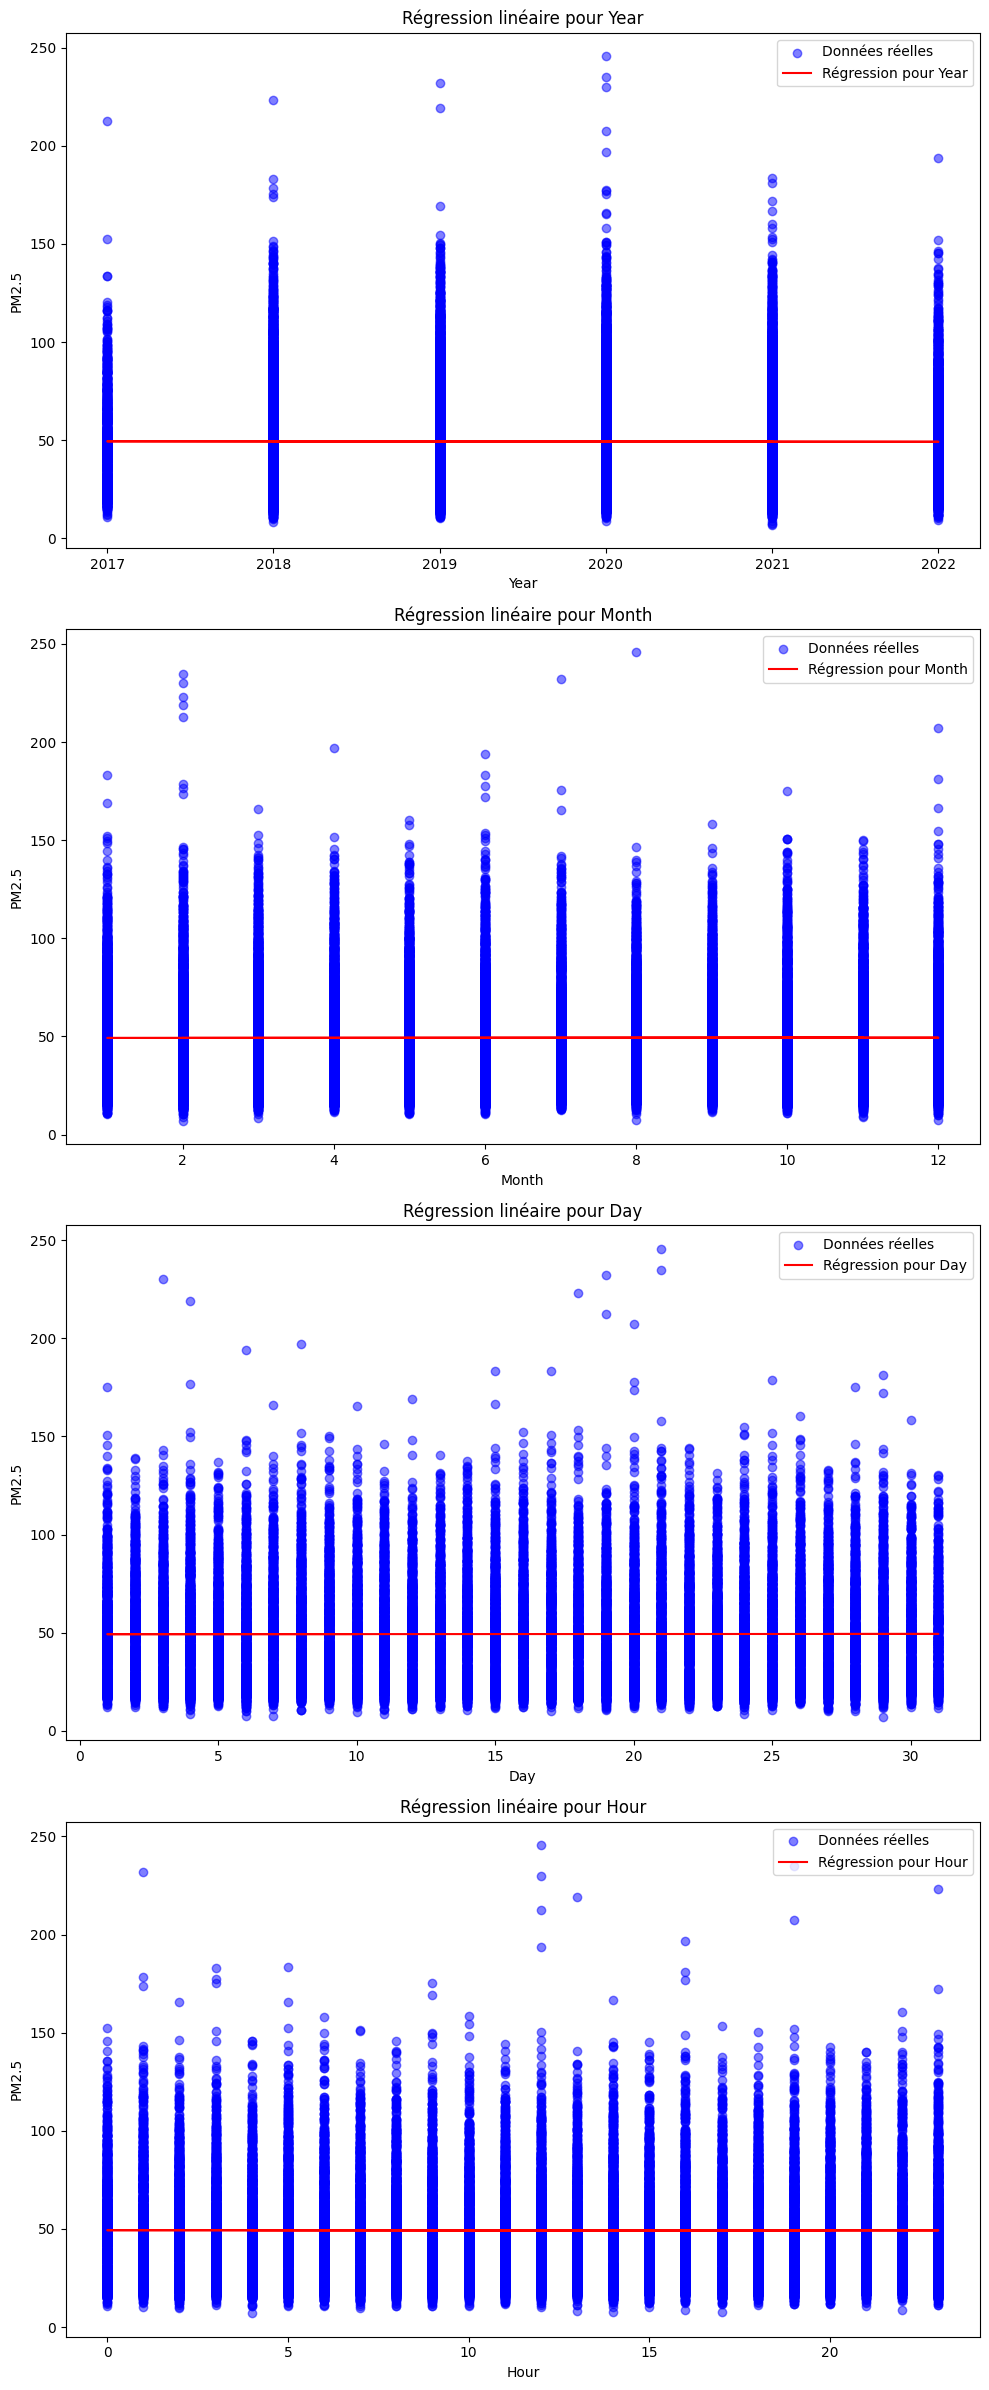

In [1235]:
def plot_regression_lines(y, columns, df, model_function):
    # Définir le nombre de sous-graphiques en fonction du nombre de colonnes
    num_columns = len(columns)
    
    # Créer un seul graphique avec des sous-graphiques
    fig, axes = plt.subplots(num_columns, 1, figsize=(10, 6 * num_columns))
    
    # Si il n'y a qu'un seul graphique, axes n'est pas une liste, alors il faut l'ajuster
    if num_columns == 1:
        axes = [axes]
    
    # Pour chaque colonne, créer un sous-graphe
    for i, column in enumerate(columns):
        ax = axes[i]
        
        # Extraire les données de la colonne comme X
        X_column = df[column].values.reshape(-1, 1)
        
        # Appliquer la régression linéaire
        theta = model_function(X_column, y)
        
        # Calculer les prédictions
        y_pred = predict(X_column, theta)
        
        # Tracer les points réels et la droite de régression
        ax.scatter(X_column, y, color='blue', label="Données réelles", alpha=0.5)
        ax.plot(X_column, y_pred, label=f"Régression pour {column}", color='red')
        
        # Ajouter des titres et légendes
        ax.set_title(f"Régression linéaire pour {column}")
        ax.set_xlabel(column)
        ax.set_ylabel("PM2.5")
        ax.legend()
    
    # Afficher la figure
    plt.tight_layout()
    plt.show()

# Appel de la fonction
columns = ['Year', 'Month', 'Day', 'Hour']
plot_regression_lines(y, columns, df, linear_regression)


## Régression  polynomiale  :

In [1236]:
X = df[['Day', 'Year', 'Month','Hour']].values
y = df['PM2.5'].values

In [1237]:
def polynomial_features(X, degree):
    poly_X = X
    for d in range(2, degree + 1):
        poly_X = np.hstack([poly_X, X ** d])
    return poly_X

In [1238]:
theta = linear_regression(X,y)
print(theta)

[ 4.33455889e-03 -4.47198492e-02  1.26858303e-02 -4.71051956e-03
  1.39533934e+02]


In [1239]:
# Fonction de validation croisée avec prétraitement et régression polynomiale
def k_fold_cross_validation(X, y, k, degree):
    # Fusionner X et y pour faciliter la division
    data = np.column_stack((X, y))
    
    # Diviser les données en k folds
    folds = cross_validation_split(data, k)
    mse_list = []
    # Itérer sur chaque pli (fold)
    for i in range(k):
        # Sélectionner les ensembles de test et d'entraînement
        test_data = folds[i]
        train_data = np.vstack([fold for j, fold in enumerate(folds) if j != i])

        X_train, y_train = train_data[:, :-1], train_data[:, -1]
        X_test, y_test = test_data[:, :-1], test_data[:, -1]

        # Appliquer le prétraitement (transformation polynomiale) séparément pour chaque pli
        X_train_poly = polynomial_features(X_train, degree)
        X_test_poly = polynomial_features(X_test, degree)

        # Appliquer le prétraitement séparément
        y_train_preprocessed, y_test_preprocessed = normalize_data_min_max(y_train, y_test)

        # Entraîner le modèle de régression linéaire
        theta_poly = linear_regression(X_train_poly, y_train_preprocessed)

        # Faire des prédictions sur l'ensemble de test
        y_pred_poly = predict(X_test_poly, theta_poly)

        # Calculer l'erreur quadratique moyenne (MSE) pour ce pli
        mse = calculate_mse(y_test_preprocessed, y_pred_poly)
        mse_list.append(mse)

    # Retourner la moyenne des MSE sur les k folds
    return np.mean(mse_list), y_pred_poly

In [1240]:
# Exemple d'application avec X, y déjà définis
k = 10
degree = 4  # Degré pour la régression polynomiale

# Effectuer la validation croisée avec prétraitement et régression polynomiale
average_mse, y_pred_poly= k_fold_cross_validation(X, y, k=k, degree=degree)
print(f"MSE moyen sur {k} folds (avec régression polynomiale de degré {degree}): {average_mse:.2f}")

MSE moyen sur 10 folds (avec régression polynomiale de degré 4): 0.02


In [1241]:
# def plot_polynomial_regression_lines(y, columns, df, model_function, degree):
#     # Définir le nombre de sous-graphiques en fonction du nombre de colonnes
#     num_columns = len(columns)
    
#     # Créer un seul graphique avec des sous-graphiques
#     fig, axes = plt.subplots(num_columns, 1, figsize=(10, 6 * num_columns))
    
#     # Si il n'y a qu'un seul graphique, axes n'est pas une liste, alors il faut l'ajuster
#     if num_columns == 1:
#         axes = [axes]
    
#     # Pour chaque colonne, créer un sous-graphe
#     for i, column in enumerate(columns):
#         ax = axes[i]
        
#         # Extraire les données de la colonne comme X
#         X_column = df[column].values.reshape(-1, 1)
        
#         # Appliquer la régression polynomiale
#         X_smooth = np.linspace(X_column.min(), X_column.max(), 100).reshape(-1, 1)
#         X_poly = polynomial_features(X_smooth, degree)
#         theta = model_function(X_poly, y)
        
#         # Calculer les prédictions
#         y_pred = predict(X_poly, theta)
        
#         # Tracer les points réels et la courbe de régression polynomiale
#         ax.scatter(X_smooth, y, color='blue', label="Données réelles", alpha=0.5)
#         ax.plot(X_smooth, y_pred, label=f"Régression polynomiale pour {column}", color='red')
        
#         # Ajouter des titres et légendes
#         ax.set_title(f"Régression polynomiale pour {column} (Degré {degree})")
#         ax.set_xlabel(column)
#         ax.set_ylabel("PM2.5")
#         ax.legend()
    
#     # Afficher la figure
#     plt.tight_layout()
#     plt.show()

# # Exemple d'appel de la fonction avec des colonnes et degré spécifié
# columns = ['Year', 'Month', 'Day', 'Hour']
# plot_polynomial_regression_lines(y, columns, df, linear_regression, degree)